In [21]:

import numpy as np
from scipy.stats import triang
import matplotlib.pyplot as plt
import math

# recursive algorithm to find the time to complete an individual task. 
def findTime(name):
    if not len(predecessDict[name]):
        return 0 + indivTimes[name]
    intermedTimes = []
    for val in predecessDict[name]:
        intermedTimes.append(findTime(val) + indivTimes[name])
    return max(intermedTimes)

# arrays to list direct predecessors for each task
aPredecess = []
bPredecess = ["A"]
cPredecess = ["A"]
dPredecess = ["C"]
ePredecess = ["A"]
fPredecess = ["B"]
gPredecess = ["C"]
hPredecess = ["C"]
iPredecess = ["F", "H"]
jPredecess = ["I", "G"]
predecessDict = {"A": aPredecess, "B": bPredecess, "C": cPredecess, "D": dPredecess, "E": ePredecess, "F": fPredecess, "G": gPredecess, "H": hPredecess, "I": iPredecess, "J": jPredecess}

# array of all the task names
taskList = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]

# array with each trial's total time to complete all tasks
trialTimes = []
# sample mean
sampleMean = 0
# number of trials
numTrials = 1000

# create numTrial values depending on parameters for each tasks time to complete. 
tA = triang.rvs(0.5, 2, 2, numTrials)
tB = triang.rvs(0.5, 1, 2, numTrials)
tC = triang.rvs(0.5, 2, 8, numTrials)
tD = triang.rvs(0.5, 1, 2, numTrials)
tE = triang.rvs(0.5, 1, 4, numTrials)
tF = triang.rvs(0.5, 2, 2, numTrials)
tG = triang.rvs(0.5, 3, 4, numTrials)
tH = triang.rvs(0.5, 0.5, 1, numTrials)
tI = triang.rvs(0.5, 1, 1, numTrials)
tJ = triang.rvs(0.5, 1, 2, numTrials)

# value for when one needs to find probability will finish before 'targetVal' days. needs to be changed so user can input. Basically, this is for P(X < targetVal)
targetVal = 18
probLessThanTarget = 0

# runs the findTime function on all tasks for x number of trials and puts result in trialTimes array
for x in range(numTrials):
    # time to complete individual task
    indivTimes = {"A": tA[x], "B": tB[x], "C": tC[x], "D": tD[x], "E": tE[x], "F": tF[x], "G": tG[x], "H": tH[x], "I": tI[x], "J": tJ[x]}
    # time to complete task and all prerequisites
    totalTime = {}

    for val in taskList:
        totalTime[val] = findTime(val)

    thisCompletionTime = totalTime[max(totalTime)]
    trialTimes.append(thisCompletionTime)
    sampleMean += thisCompletionTime/numTrials

    if thisCompletionTime < targetVal:
        probLessThanTarget += 1/numTrials

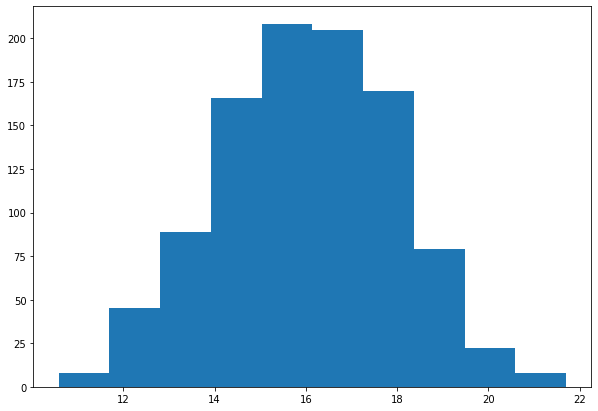

Average Time to Complete all Tasks: 16.017419655317315
Probability that all tasks finished before 18 days is 0.8410000000000006
Sample Variance is 3.7133810295431884
Standard Deviation is 1.9270135000936524
95 Percent Confidence Interval is from 15.89798212117041 to 16.13685718946422


In [22]:
# rudimentary histogram to show results of trials
x = np.array(trialTimes)
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(x)
plt.show()

# sample variance
sampleVariance = 0
for time in trialTimes:
    sampleVariance += pow(time - sampleMean, 2)/(numTrials-1)
standardDev = math.sqrt(sampleVariance)

# zScore for 95% confidence interval
zScore = 1.96
confIntLow = sampleMean - (zScore*standardDev/math.sqrt(numTrials))
confIntHigh = sampleMean + (zScore*standardDev/math.sqrt(numTrials))

# prints average time to complete all tasks
print("Average Time to Complete all Tasks: " + str(sampleMean))
# prints P(X < targetVal) where X represent time to finish all tasks
print("Probability that all tasks finished before " + str(targetVal) + " days is " + str(probLessThanTarget))
print("Sample Variance is " + str(sampleVariance))
print("Standard Deviation is " + str(standardDev))
print("95 Percent Confidence Interval is from " + str(confIntLow) + " to " + str(confIntHigh))



In [ ]:

# will try my DiGraph implementation here later after first doing a recursive implementation attempt

graph = nx.DiGraph()